# The Rössler Attractor

## Introduction

The Rössler attractor is a system of three non-linear ordinary differential equations originally studied by Otto Rössler in 1976. It was designed as a minimal chaotic system that exhibits a characteristic spiral structure with a single lobe, making it simpler to analyze than the Lorenz attractor while still displaying rich chaotic dynamics.

## Mathematical Formulation

The Rössler system is defined by the following set of coupled differential equations:

$$\frac{dx}{dt} = -y - z$$

$$\frac{dy}{dt} = x + ay$$

$$\frac{dz}{dt} = b + z(x - c)$$

where $a$, $b$, and $c$ are system parameters that control the dynamics.

### Parameter Regimes

The system exhibits different behaviors depending on parameter values:

- **Periodic behavior**: For small values of $c$
- **Period-doubling cascade**: As $c$ increases
- **Chaotic regime**: For standard parameters $a = 0.2$, $b = 0.2$, $c = 5.7$

### Geometric Interpretation

The equations can be understood geometrically:

1. The first two equations ($\dot{x}$ and $\dot{y}$) create a rotation in the $xy$-plane
2. The third equation ($\dot{z}$) provides a "kick" that prevents the trajectory from closing on itself

The resulting attractor has a characteristic single-scroll shape, sometimes called a "folded band" structure.

## Lyapunov Exponents

The chaotic nature of the Rössler system can be quantified by its Lyapunov exponents $(\lambda_1, \lambda_2, \lambda_3)$. For the standard parameters:

$$\lambda_1 \approx 0.07, \quad \lambda_2 \approx 0, \quad \lambda_3 \approx -5.39$$

The positive largest exponent $\lambda_1 > 0$ confirms the presence of chaos, indicating sensitive dependence on initial conditions.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Numerical Implementation

We define the Rössler system as a function suitable for numerical integration using `scipy.integrate.odeint`.

In [2]:
def rossler_system(state, t, a, b, c):
    """
    Compute the time derivatives for the Rössler system.
    
    Parameters
    ----------
    state : array-like
        Current state [x, y, z]
    t : float
        Current time (not used, but required by odeint)
    a, b, c : float
        System parameters
        
    Returns
    -------
    derivatives : list
        Time derivatives [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = state
    
    dx_dt = -y - z
    dy_dt = x + a * y
    dz_dt = b + z * (x - c)
    
    return [dx_dt, dy_dt, dz_dt]

## Setting Parameters and Initial Conditions

We use the standard chaotic parameters and integrate the system over a sufficiently long time interval to observe the attractor's structure.

In [3]:
# Standard chaotic parameters
a = 0.2
b = 0.2
c = 5.7

# Initial conditions
x0 = 0.0
y0 = 1.0
z0 = 0.0
initial_state = [x0, y0, z0]

# Time array
t_max = 500.0
dt = 0.01
t = np.arange(0, t_max, dt)

print(f"Rössler System Parameters: a = {a}, b = {b}, c = {c}")
print(f"Initial conditions: x₀ = {x0}, y₀ = {y0}, z₀ = {z0}")
print(f"Integration time: {t_max} time units with dt = {dt}")
print(f"Total number of time steps: {len(t)}")

Rössler System Parameters: a = 0.2, b = 0.2, c = 5.7
Initial conditions: x₀ = 0.0, y₀ = 1.0, z₀ = 0.0
Integration time: 500.0 time units with dt = 0.01
Total number of time steps: 50000


## Numerical Integration

We solve the system using `scipy.integrate.odeint`, which employs adaptive step-size Runge-Kutta methods internally.

In [4]:
# Integrate the Rössler equations
solution = odeint(rossler_system, initial_state, t, args=(a, b, c))

# Extract components
x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]

# Discard transient (first 10% of trajectory)
transient = int(0.1 * len(t))
x_steady = x[transient:]
y_steady = y[transient:]
z_steady = z[transient:]
t_steady = t[transient:]

print(f"Integration complete. Solution shape: {solution.shape}")
print(f"Transient discarded: {transient} points")
print(f"Steady-state trajectory points: {len(x_steady)}")

Integration complete. Solution shape: (50000, 3)
Transient discarded: 5000 points
Steady-state trajectory points: 45000


## Visualization

We create a comprehensive visualization showing:
1. The 3D attractor structure
2. 2D projections onto the coordinate planes
3. Time series of each variable

Figure saved to 'plot.png'


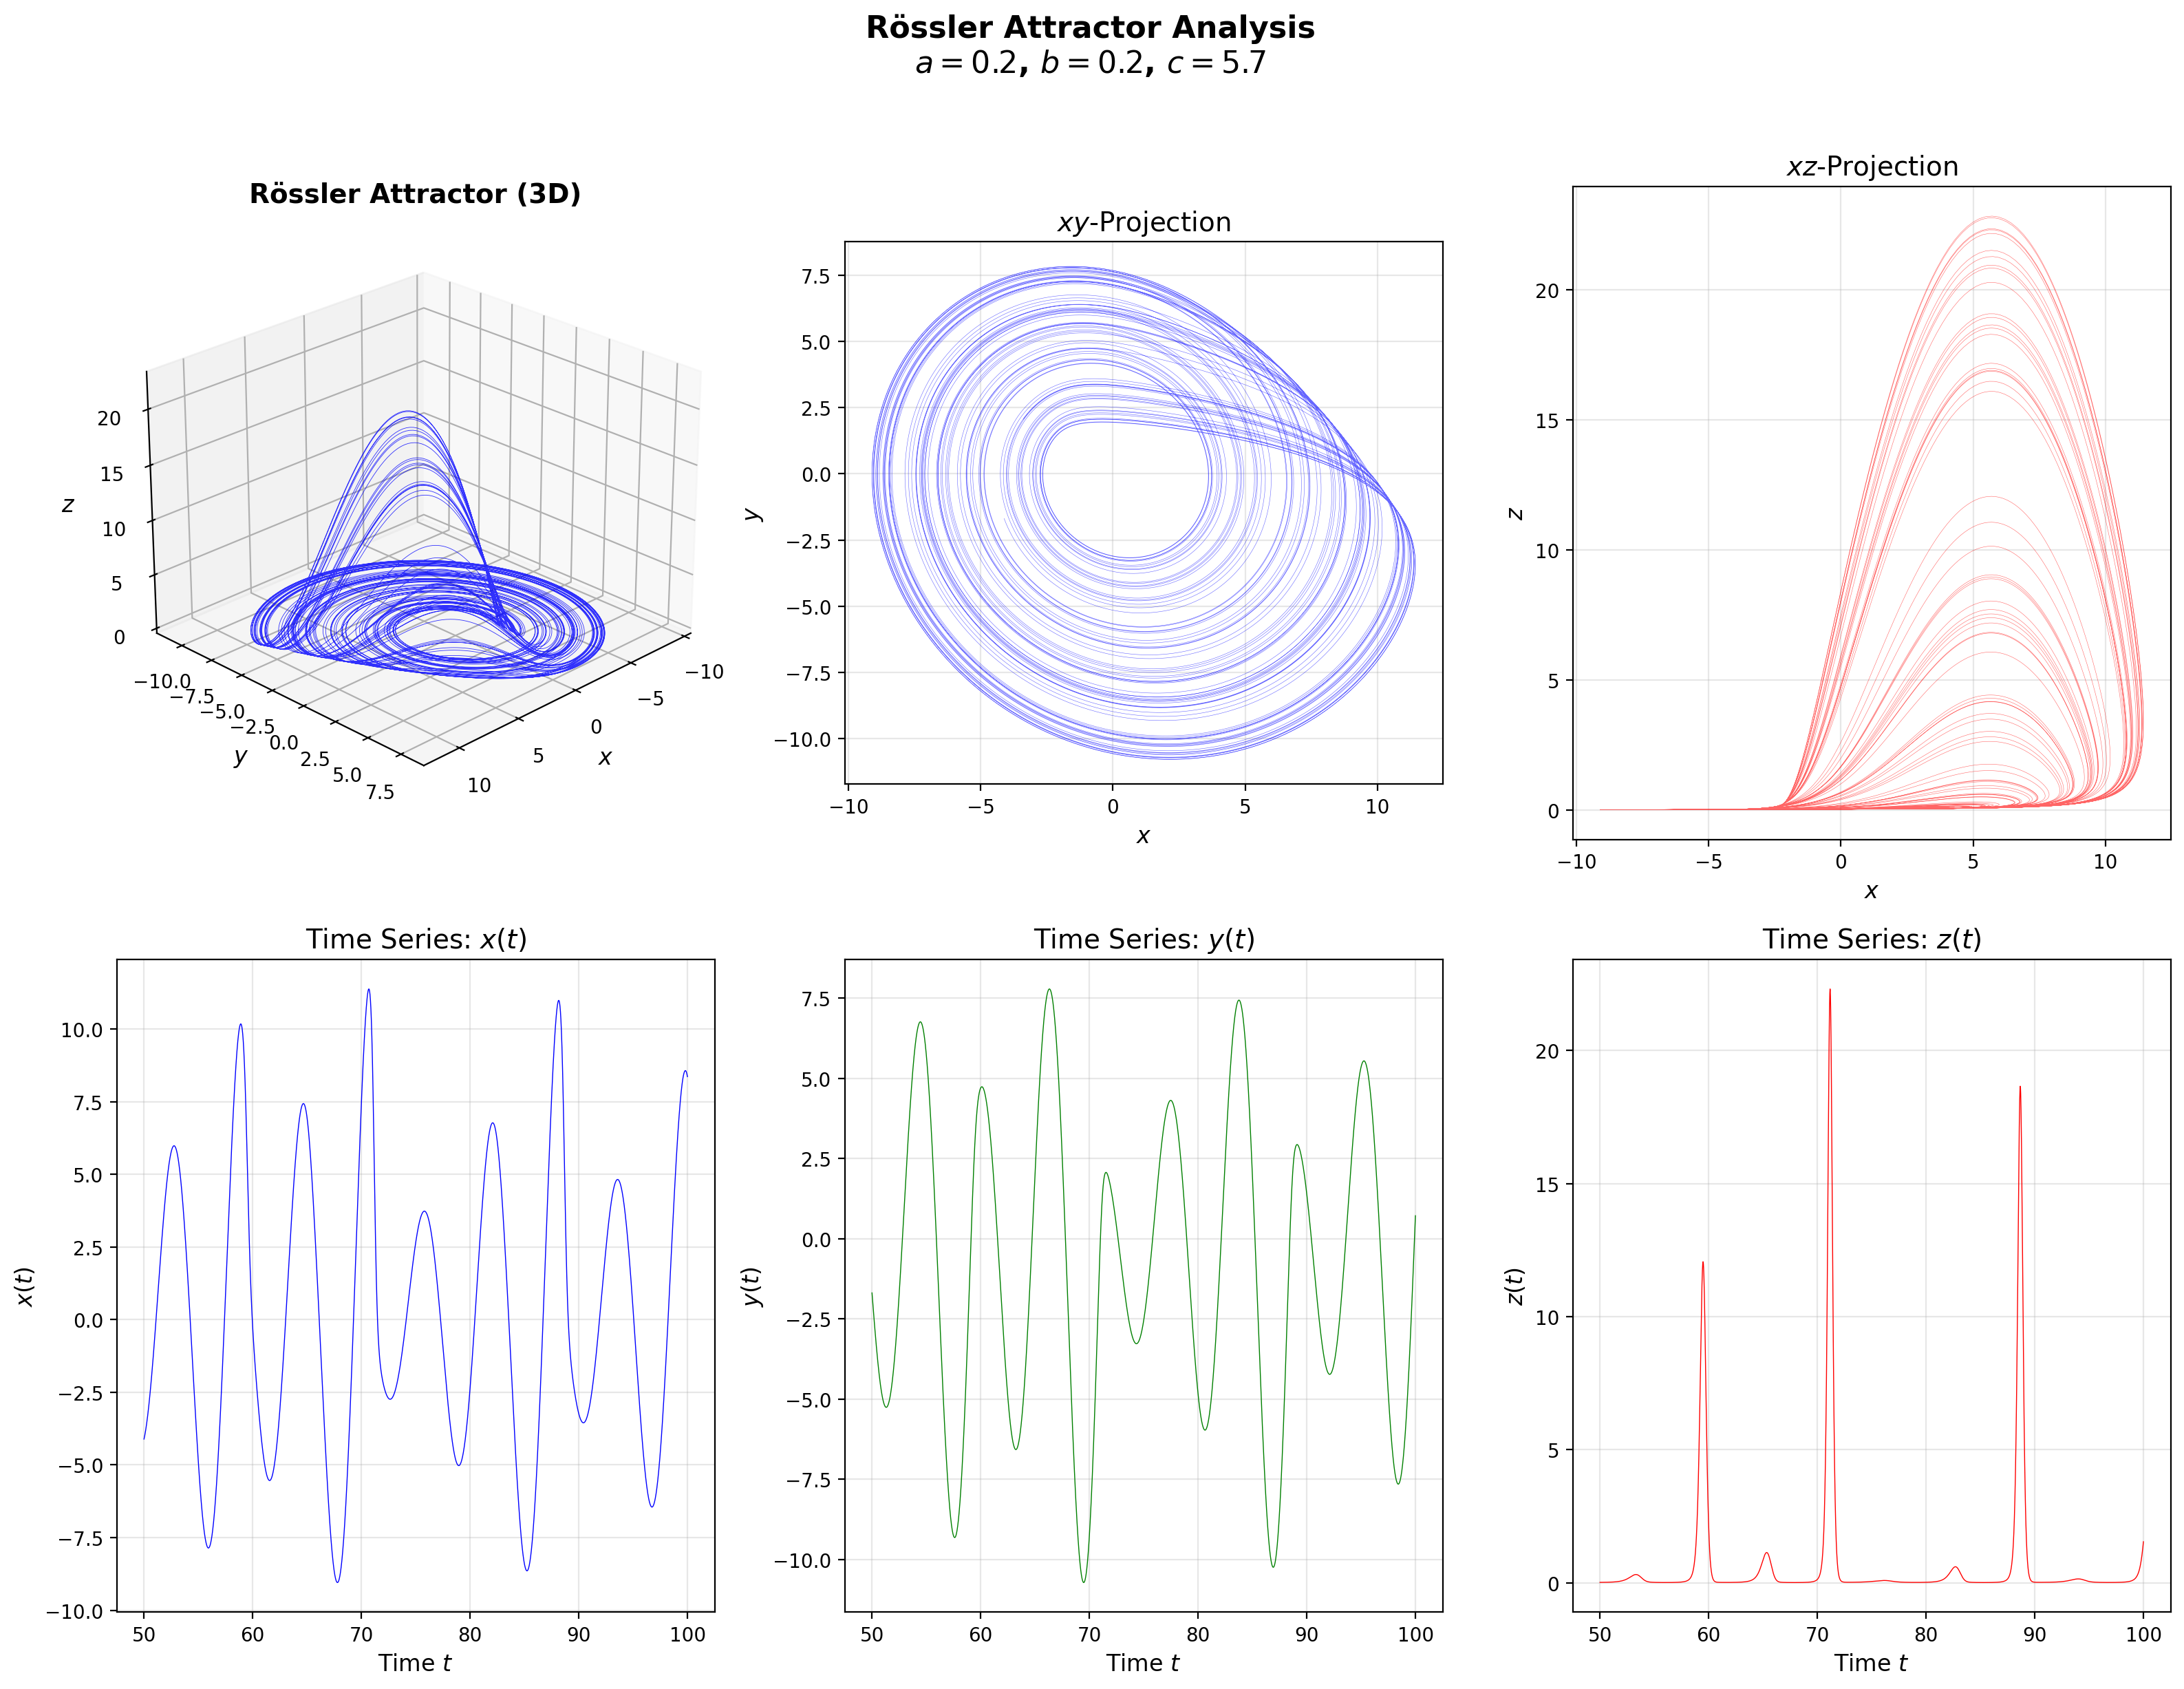

In [5]:
# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

# 3D Attractor plot
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.plot(x_steady, y_steady, z_steady, 'b-', linewidth=0.3, alpha=0.8)
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)
ax1.set_zlabel('$z$', fontsize=12)
ax1.set_title('Rössler Attractor (3D)', fontsize=14, fontweight='bold')
ax1.view_init(elev=25, azim=45)

# XY projection
ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(x_steady, y_steady, 'b-', linewidth=0.2, alpha=0.6)
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('$y$', fontsize=12)
ax2.set_title('$xy$-Projection', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal', adjustable='box')

# XZ projection
ax3 = fig.add_subplot(2, 3, 3)
ax3.plot(x_steady, z_steady, 'r-', linewidth=0.2, alpha=0.6)
ax3.set_xlabel('$x$', fontsize=12)
ax3.set_ylabel('$z$', fontsize=12)
ax3.set_title('$xz$-Projection', fontsize=14)
ax3.grid(True, alpha=0.3)

# Time series - X
ax4 = fig.add_subplot(2, 3, 4)
ax4.plot(t_steady[:5000], x_steady[:5000], 'b-', linewidth=0.5)
ax4.set_xlabel('Time $t$', fontsize=12)
ax4.set_ylabel('$x(t)$', fontsize=12)
ax4.set_title('Time Series: $x(t)$', fontsize=14)
ax4.grid(True, alpha=0.3)

# Time series - Y
ax5 = fig.add_subplot(2, 3, 5)
ax5.plot(t_steady[:5000], y_steady[:5000], 'g-', linewidth=0.5)
ax5.set_xlabel('Time $t$', fontsize=12)
ax5.set_ylabel('$y(t)$', fontsize=12)
ax5.set_title('Time Series: $y(t)$', fontsize=14)
ax5.grid(True, alpha=0.3)

# Time series - Z
ax6 = fig.add_subplot(2, 3, 6)
ax6.plot(t_steady[:5000], z_steady[:5000], 'r-', linewidth=0.5)
ax6.set_xlabel('Time $t$', fontsize=12)
ax6.set_ylabel('$z(t)$', fontsize=12)
ax6.set_title('Time Series: $z(t)$', fontsize=14)
ax6.grid(True, alpha=0.3)

plt.suptitle(f'Rössler Attractor Analysis\n$a={a}$, $b={b}$, $c={c}$', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Save the figure
plt.savefig('rossler_attractor_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Figure saved to 'plot.png'")

plt.show()

## Analysis: Sensitive Dependence on Initial Conditions

A hallmark of chaotic systems is sensitive dependence on initial conditions (the "butterfly effect"). We demonstrate this by comparing two trajectories with slightly different initial conditions.

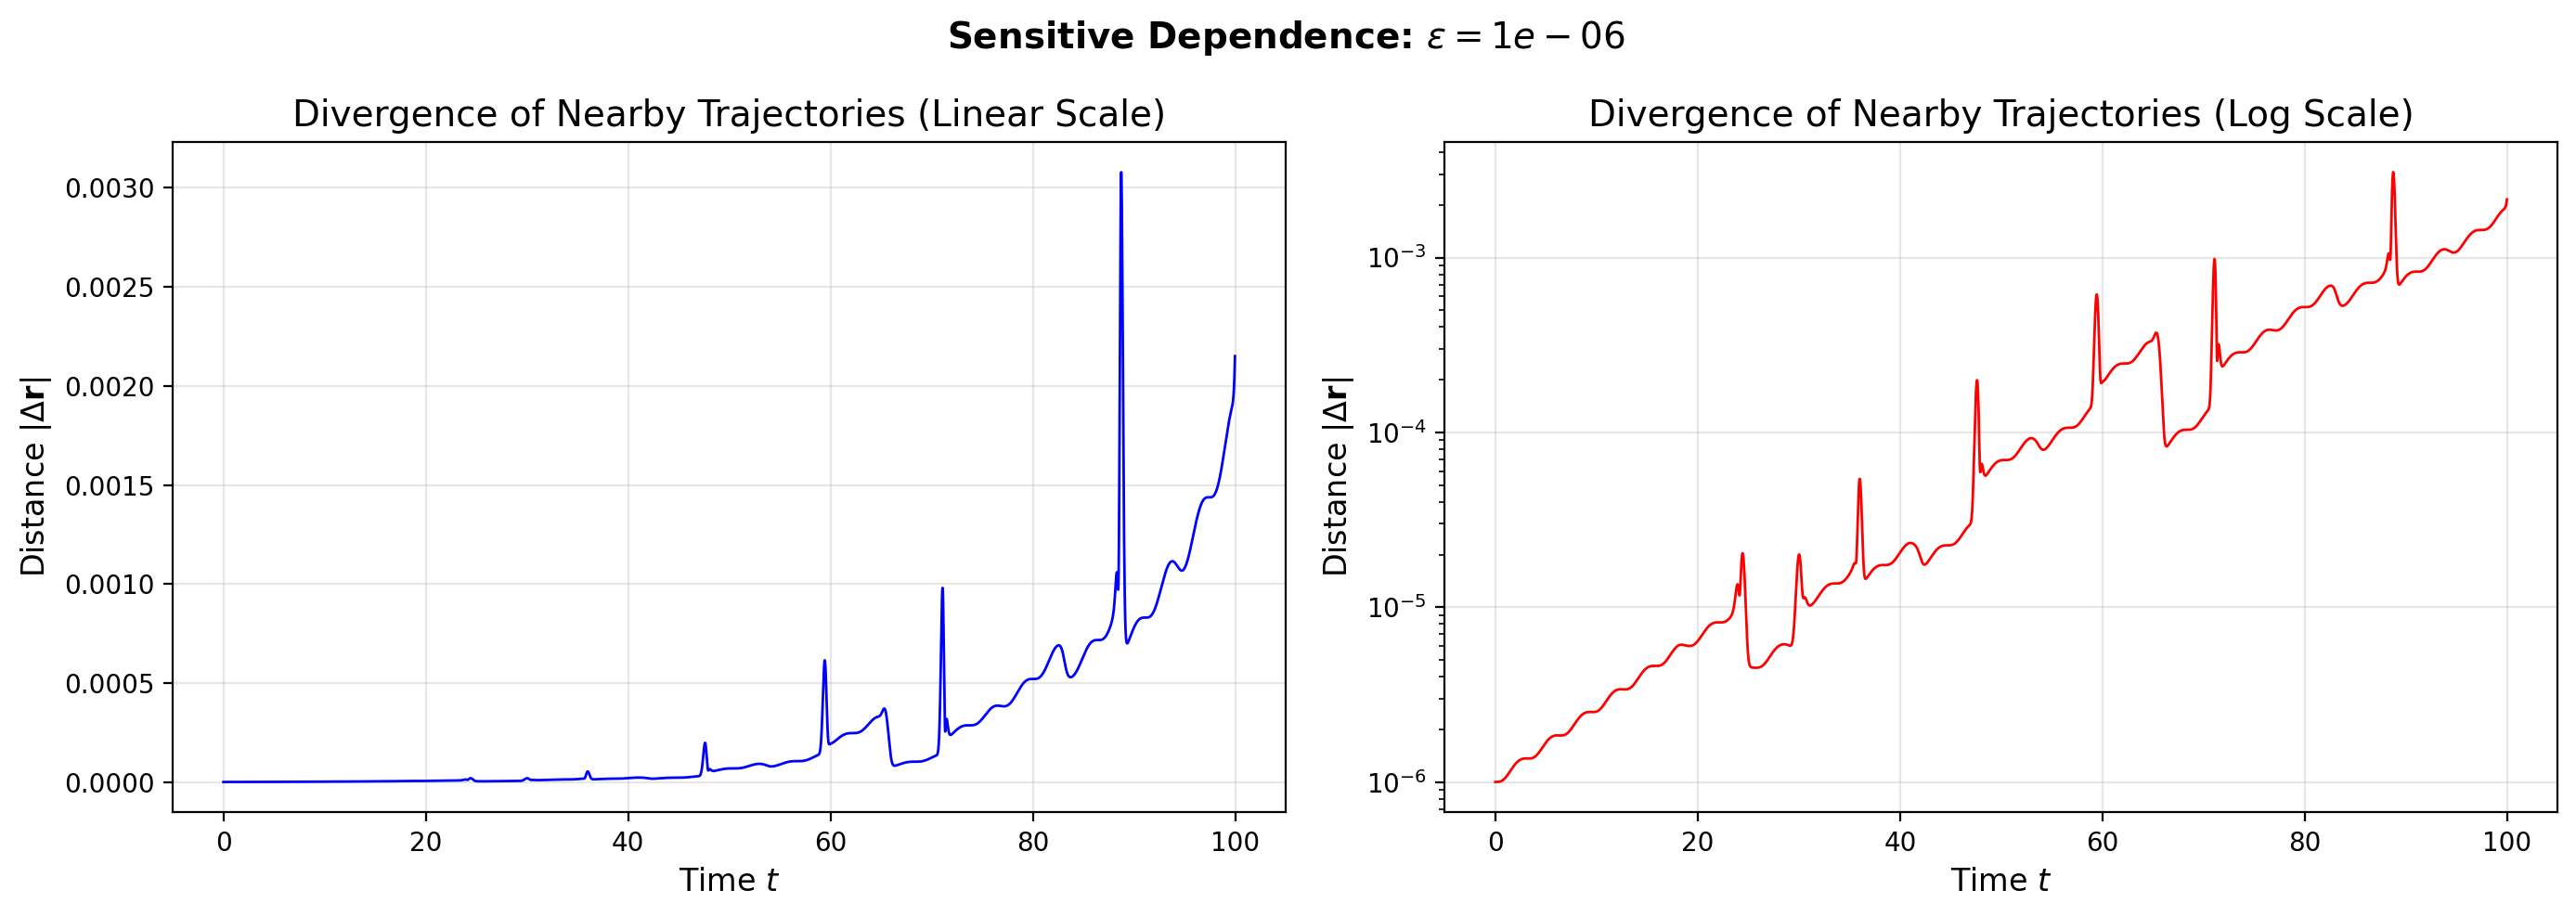


Estimated largest Lyapunov exponent: λ₁ ≈ 0.072
(Literature value: λ₁ ≈ 0.07)


In [6]:
# Compare trajectories with slightly different initial conditions
epsilon = 1e-6  # Small perturbation
initial_state_perturbed = [x0 + epsilon, y0, z0]

# Integrate both systems
t_compare = np.arange(0, 100, dt)
solution1 = odeint(rossler_system, initial_state, t_compare, args=(a, b, c))
solution2 = odeint(rossler_system, initial_state_perturbed, t_compare, args=(a, b, c))

# Calculate distance between trajectories
distance = np.sqrt(np.sum((solution1 - solution2)**2, axis=1))

# Plot the divergence
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
axes[0].plot(t_compare, distance, 'b-', linewidth=1)
axes[0].set_xlabel('Time $t$', fontsize=12)
axes[0].set_ylabel('Distance $|\\Delta \\mathbf{r}|$', fontsize=12)
axes[0].set_title('Divergence of Nearby Trajectories (Linear Scale)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Log scale
axes[1].semilogy(t_compare, distance, 'r-', linewidth=1)
axes[1].set_xlabel('Time $t$', fontsize=12)
axes[1].set_ylabel('Distance $|\\Delta \\mathbf{r}|$', fontsize=12)
axes[1].set_title('Divergence of Nearby Trajectories (Log Scale)', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'Sensitive Dependence: $\\epsilon = {epsilon}$', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Estimate Lyapunov exponent from initial exponential growth
# Use early time where growth is exponential
fit_region = (distance > 1e-10) & (distance < 1.0) & (t_compare < 30)
if np.sum(fit_region) > 10:
    t_fit = t_compare[fit_region]
    d_fit = distance[fit_region]
    coeffs = np.polyfit(t_fit, np.log(d_fit), 1)
    lyapunov_estimate = coeffs[0]
    print(f"\nEstimated largest Lyapunov exponent: λ₁ ≈ {lyapunov_estimate:.3f}")
    print(f"(Literature value: λ₁ ≈ 0.07)")

## Conclusion

The Rössler attractor demonstrates several key features of chaotic dynamics:

1. **Strange attractor**: The trajectory is bounded but never repeats, filling a fractal subset of phase space
2. **Sensitive dependence**: Nearby trajectories diverge exponentially (positive Lyapunov exponent)
3. **Deterministic chaos**: Despite being fully deterministic, long-term prediction is impossible

The simplicity of the Rössler system—with only one nonlinear term ($xz$)—makes it an ideal pedagogical model for studying chaos while retaining all the essential features of more complex chaotic systems.

### References

1. Rössler, O. E. (1976). "An equation for continuous chaos". *Physics Letters A*, 57(5), 397-398.
2. Strogatz, S. H. (2015). *Nonlinear Dynamics and Chaos*. Westview Press.
3. Sprott, J. C. (2003). *Chaos and Time-Series Analysis*. Oxford University Press.